# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

XYZ is a multinational company based in Milan, Italy which is currently organizing a corporate event and has invited 
business executives from its offices spread all over the world for a 5 day corporate program. The company has to put
a good program, including a hotel of residence, event space and nearby venues in the Milan Area as the company is located there and also some more restaurants,shopping malls and fashion stores in some other areas spread over larger radius within the city and the company also intends to offer a one day tour to executives to the city of Como.

So the company’s purpose is to make a list of such places in Milan. The executives will be living in Milan and the
city can also be visited in the evenings after work. The company chooses to take executives for a visit to nearby venues
in the Milan area after work. The company also intends to offer a complete one day tour to the executives for visiting the city of Como(approx 50 km from Milan) in Italy on the 6th day(being Saturday) at the end of the week. 

We can use data science and obtain results for some hotels, event space and nearby venues in the Milan Area as the company is located there and also some more restaurants,shopping malls and fashion stores in some other areas spread over larger radius within the city. Similarly, we can also find out each neighborhood in Como with the top 10 common venues so that the company can choose the neighborhoods as per the interested venues/maximum no of venues in a neighborhood.

## Data <a name="data"></a>

Based on definition of our problem, We can list the data as below:
    
• I found the data of the first, second and third level Administrative Divisions of the entire Country of Italy 
 from http://www.geonames.org along with the geospatial data. I cleaned the data and grouped it from Country to State
 and then to City of Milan and Como.
• The json file has the coordinates and data of the city of Milan. I have cleaned it to obtain the required data for this project.
•  I used it to create a map of places in Milan and Como.
•  I have used Foursquare API to run the queries for hotels, event space and nearby venues in the Milan Area as the company is located there, also some more restaurants,shopping malls and fashion stores in some other areas spread over larger radius within the city. I have also used it to find top 10 most common venues for each neighnorhood for the city of Como in Italy.


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Loading tabular data by reading it from the file into pandas dataframe.
df=pd.read_table('IT.txt',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,IT,67010,Barete,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.4501,13.2806,4
1,IT,67012,Cagnano Amiterno,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.4574,13.2279,4
2,IT,67012,San Giovanni,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.4642,13.2584,4
3,IT,67013,Mascioni,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.5282,13.3492,4
4,IT,67013,Campotosto,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.5588,13.3680,4


In [3]:
#Assigning columns names to each column as mentioned in the downloaded file. Admin1 corresponds to states of Italy, Admin2 
#corresponds to cities and Admin3 corresponds to places/neighborhoods in the cities.
df.columns = ["Country_code","postal_code","place_name","admin_name1","admin_code1","admin_name2","admin_code2","admin_name3","admin_code3","latitude","longitude","accuracy"]

In [4]:
df.head()

,Country_code,postal_code,place_name,admin_name1,admin_code1,admin_name2,admin_code2,admin_name3,admin_code3,latitude,longitude,accuracy
0,IT,67010,Barete,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.4501,13.2806,4
1,IT,67012,Cagnano Amiterno,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.4574,13.2279,4
2,IT,67012,San Giovanni,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.4642,13.2584,4
3,IT,67013,Mascioni,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.5282,13.3492,4
4,IT,67013,Campotosto,Abruzzi,1,L'Aquila,AQ,NaN,NaN,42.5588,13.3680,4


In [5]:
#Deleting columns that are not needed
columns = ['admin_code1', 'admin_code2','admin_name3','admin_code3','accuracy']
df.drop(columns, inplace=True, axis=1)

In [6]:
df.head()

,Country_code,postal_code,place_name,admin_name1,admin_name2,latitude,longitude
0,IT,67010,Barete,Abruzzi,L'Aquila,42.4501,13.2806
1,IT,67012,Cagnano Amiterno,Abruzzi,L'Aquila,42.4574,13.2279
2,IT,67012,San Giovanni,Abruzzi,L'Aquila,42.4642,13.2584
3,IT,67013,Mascioni,Abruzzi,L'Aquila,42.5282,13.3492
4,IT,67013,Campotosto,Abruzzi,L'Aquila,42.5588,13.3680


In [7]:
df.shape

(18385, 7)

__Note that there are 18,385 rows in the above table as it contains data of the entire country of Italy. Hence, we will use  groupby functions to obtain data for the state Lombardia and respective cities of Milan and Como for the project__

In [8]:
df1=df.groupby('admin_name1')

In [9]:
#Obtaining data for the state 'Lombardia'
df2=df1.get_group('Lombardia')

In [10]:
df2.head()

,Country_code,postal_code,place_name,admin_name1,admin_name2,latitude,longitude
6598,IT,24010,Ubiale,Lombardia,Bergamo,45.7835,9.6165
6599,IT,24010,Peghera,Lombardia,Bergamo,45.8731,9.5692
6600,IT,24010,Roncobello,Lombardia,Bergamo,45.9557,9.7523
6601,IT,24010,Piazzolo,Lombardia,Bergamo,45.9798,9.6705
6602,IT,24010,Taleggio,Lombardia,Bergamo,45.8934,9.5648


In [11]:
df2.shape

(2500, 7)

In [12]:
#Assigning the required columns to another dataframe
data=df2[['postal_code','admin_name2','place_name','latitude','longitude']]

In [13]:
data.head()

,postal_code,admin_name2,place_name,latitude,longitude
6598,24010,Bergamo,Ubiale,45.7835,9.6165
6599,24010,Bergamo,Peghera,45.8731,9.5692
6600,24010,Bergamo,Roncobello,45.9557,9.7523
6601,24010,Bergamo,Piazzolo,45.9798,9.6705
6602,24010,Bergamo,Taleggio,45.8934,9.5648


In [14]:
#Renaming columns with the appropriate names i.e Borough for Cities and Neighborhoods for the places in the city
neighborhoodb = data.rename(columns={'postal_code':'PostalCode','admin_name2':'Borough','place_name':'Neighborhood','latitude':'Latitude','longitude':'Longitude'})
neighborhoodb.reset_index(inplace = True, drop = True) 

In [15]:
neighborhoodb.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,24010,Bergamo,Ubiale,45.7835,9.6165
1,24010,Bergamo,Peghera,45.8731,9.5692
2,24010,Bergamo,Roncobello,45.9557,9.7523
3,24010,Bergamo,Piazzolo,45.9798,9.6705
4,24010,Bergamo,Taleggio,45.8934,9.5648


In [16]:
neighborhoodb.shape

(2500, 5)

In [17]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoodb['Borough'].unique()),
        neighborhoodb.shape[0]
    )
)

The dataframe has 12 boroughs and 2500 neighborhoods.


In [18]:
#Unique boroughs in each neighborhood
neighborhoodb['Borough'].unique()

array(['Bergamo', 'Brescia', 'Como', 'Cremona', 'Lecco', 'Lodi',
       'Monza e Brianza', 'Milano', 'Mantova', 'Pavia', 'Sondrio',
       'Varese'], dtype=object)

In [19]:
#Using groupby to obtain data for specific cities 
neighborhoodc=neighborhoodb.groupby('Borough')

In [20]:
#Obtaining data for the city of  Milano
neighborhoodsh=neighborhoodc.get_group('Milano')

In [21]:
neighborhoodsh.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
1440,20010,Milano,Cornaredo,45.5013,9.0268
1441,20010,Milano,Mesero,45.5023,8.8554
1442,20010,Milano,Rogorotto,45.5062,8.9694
1443,20010,Milano,San Giorgio Su Legnano,45.5738,8.9137
1444,20010,Milano,Vanzago,45.5257,8.9910


In [22]:
#Resetting the index
neighborhoodsh.reset_index(inplace = True, drop = True)
neighborhoodsh.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,20010,Milano,Cornaredo,45.5013,9.0268
1,20010,Milano,Mesero,45.5023,8.8554
2,20010,Milano,Rogorotto,45.5062,8.9694
3,20010,Milano,San Giorgio Su Legnano,45.5738,8.9137
4,20010,Milano,Vanzago,45.5257,8.9910


In [23]:
neighborhoodsh.shape

(279, 5)

In [24]:
#Assigning Milano location data columns to separate dataframe in order to merge neighbords with common postal code & borough
geo=neighborhoodsh[['PostalCode','Latitude','Longitude']]
geo.head()


,PostalCode,Latitude,Longitude
0,20010,45.5013,9.0268
1,20010,45.5023,8.8554
2,20010,45.5062,8.9694
3,20010,45.5738,8.9137
4,20010,45.5257,8.9910


__As there are several location values for the same postal code, lets group the data by postal code and take the mean
of latitude and longitude values for each postal code__

In [25]:
geo1 = geo.groupby('PostalCode').mean().reset_index()

In [26]:
geo1.head()

,PostalCode,Latitude,Longitude
0,20010,45.508617,8.918033
1,20011,45.467200,8.918700
2,20012,45.506800,8.815500
3,20013,45.464600,8.884500
4,20014,45.553400,8.979200


__Please note that are no un-assigned Boroughs or Neighborhoods in the file__

In [27]:
#Merging neighborhoods in the same row with a comma having the same postal code and borough in Como
neighborsh= neighborhoodsh.groupby(['PostalCode','Borough'])['Neighborhood'].agg( ','.join).reset_index()

In [28]:
neighborsh.head()

,PostalCode,Borough,Neighborhood
0,20010,Milano,"Cornaredo,Mesero,Rogorotto,San Giorgio Su Legn..."
1,20011,Milano,"Corbetta,Battuello,Cerello"
2,20012,Milano,Cuggiono
3,20013,Milano,"Magenta,Ponte Nuovo"
4,20014,Milano,"Nerviano,Sant'Ilario Milanese"


In [29]:
#Merging the postalcode, borough and neighborhood table with geospatial data table to create a new dataframe
neighborhoods = pd.merge(neighborsh, geo1,on=['PostalCode'], how='inner',sort=False)

In [30]:
#Resetting the index
neighborhoods.reset_index(inplace = True, drop = True)
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,20010,Milano,"Cornaredo,Mesero,Rogorotto,San Giorgio Su Legn...",45.508617,8.918033
1,20011,Milano,"Corbetta,Battuello,Cerello",45.467200,8.918700
2,20012,Milano,Cuggiono,45.506800,8.815500
3,20013,Milano,"Magenta,Ponte Nuovo",45.464600,8.884500
4,20014,Milano,"Nerviano,Sant'Ilario Milanese",45.553400,8.979200


In [31]:
neighborhoods.shape

(96, 5)

__Getting data for the Como city__

In [32]:
#Getting data for the Como city
neighs=neighborhoodc.get_group('Como')
neighs.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
731,22010,Como,San Gregorio,46.1464,9.3009
732,22010,Como,Pianello Del Lario,46.1028,9.2769
733,22010,Como,San Siro,46.0657,9.2688
734,22010,Como,Piano Porlezza,46.0333,9.1667
735,22010,Como,San Bartolomeo Val Cavargna,46.0835,9.1491


In [33]:
neighs.reset_index(inplace = True, drop = True)
neighs.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,22010,Como,San Gregorio,46.1464,9.3009
1,22010,Como,Pianello Del Lario,46.1028,9.2769
2,22010,Como,San Siro,46.0657,9.2688
3,22010,Como,Piano Porlezza,46.0333,9.1667
4,22010,Como,San Bartolomeo Val Cavargna,46.0835,9.1491


In [34]:
#Assigning Como location data columns to separate dataframe
geodata=neighs[['PostalCode','Latitude','Longitude']]
geodata.head()

,PostalCode,Latitude,Longitude
0,22010,46.1464,9.3009
1,22010,46.1028,9.2769
2,22010,46.0657,9.2688
3,22010,46.0333,9.1667
4,22010,46.0835,9.1491


__As there are several location values for the same postal code, we can group the data by postal code and take the mean
of latitude and longitude values for each postal code__

In [35]:
geodata1 = geodata.groupby('PostalCode').mean().reset_index()

In [36]:
geodata1.head()

,PostalCode,Latitude,Longitude
0,22010,46.049728,9.209642
1,22011,45.991950,9.235850
2,22012,45.843100,9.071900
3,22013,46.156150,9.333300
4,22014,46.130000,9.281700


__Please note that are no un-assigned Boroughs or Neighborhoods in the file__

In [37]:
#Merging neighborhoods in the same row with a comma having the same postal code and borough in Como
neighbors= neighs.groupby(['PostalCode','Borough'])['Neighborhood'].agg( ','.join).reset_index()

In [38]:
neighbors.head(10)

,PostalCode,Borough,Neighborhood
0,22010,Como,"San Gregorio,Pianello Del Lario,San Siro,Piano..."
1,22011,Como,"Griante,Cadenabbia"
2,22012,Como,Cernobbio
3,22013,Como,"Vercana,Domaso"
4,22014,Como,Dongo
5,22015,Como,Gravedona
6,22016,Como,"Lenno,Tremezzina"
7,22017,Como,Menaggio
8,22018,Como,"Porlezza,Cima"
9,22019,Como,Tremezzo


In [39]:
neighbors.shape

(50, 3)

In [40]:
#Merging the postalcode, borough and neighborhood table with geospatial data table to create a new dataframe
cneighborhoods = pd.merge(neighbors, geodata1,on=['PostalCode'], how='inner',sort=False)
       
cneighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,22010,Como,"San Gregorio,Pianello Del Lario,San Siro,Piano...",46.049728,9.209642
1,22011,Como,"Griante,Cadenabbia",45.991950,9.235850
2,22012,Como,Cernobbio,45.843100,9.071900
3,22013,Como,"Vercana,Domaso",46.156150,9.333300
4,22014,Como,Dongo,46.130000,9.281700


In [41]:
cneighborhoods.shape

(50, 5)

In [42]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 

## 1. Looking for hotels,event space, shopping malls, fashion stores, restaurants and cafes in Milan Area of the City and also other areas in the City.

__Use geopy library to get the latitude and longitude values of Milan City__

In [43]:
address = 'Milan, Italy'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milano are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milano are 45.4668, 9.1905.


__Create a map of Milan with neighborhoods superimposed on top.__

In [44]:
# create map of Milano using latitude and longitude values
map_milano= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milano)  
    
map_milano

__Defining Foursquare Credentials and Version__

In [45]:
CLIENT_ID = 'FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC' #  Foursquare ID
CLIENT_SECRET = '1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC
CLIENT_SECRET:1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1


__We are interested in looking for a hotel in the Area/Neighborhood Milano of the Borough Milano with postal code 20121 as the company is also located there.__
__From the above data, we know the location of the Neighborhood Milano in the Borough Milano__

In [132]:
neighborhoods.loc[58,'Neighborhood']

'Milano'

In [133]:
neighborhood_latitude = neighborhoods.loc[58, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[58, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[58, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Milano are 45.4643, 9.1895.


__Foursquare__

Let's use Foursquare API to get info on hotels,event space and nearby venues in the Milan area of the city ad also info on
shopping malls, fashion stores, restaurants spread over larger radius in the city of Milan,Italy.

We will specifying search queries for hotels,nearby venues in the required area and specific search queries for shopping malls, fashion stores, restaurants to obain results for each of the above. 

We will also be using Foursquare to obtain venues data for the city of Como.

__We will obtain hotel data within a radius of 500 meters from the Milan Area and then obtain data for the__
__required postal code__

In [134]:
#Now, let's input a search query for top 100 hotels that are in Milan area within a radius of 500 meters.
search_query = 'Hotel'
LIMIT=100
radius = 500

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC&client_secret=1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1&ll=45.4643,9.1895&v=20180605&query=Hotel&radius=500&limit=100'

In [135]:
# Send the GET Request and examine the results
results = requests.get(url).json()
#results

In [136]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet
0,56e8914e498ef02d677a8ea1,Room Mate Giulia Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1572895451,False,Via silvio Pellico 4,45.465250,9.189396,"[{'label': 'display', 'lat': 45.46525036521511...",106,20121,IT,Duomo,Milano,Lombardia,Italia,"[Via silvio Pellico 4, 20121 Milano Lombardia,...",NaN,NaN
1,4b058876f964a52017c722e3,Hotel NH Collection Milano President,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1572895451,False,"Largo Augusto, 10",45.463132,9.197880,"[{'label': 'display', 'lat': 45.46313214006357...",667,20122,IT,Duomo,Milano,Lombardia,Italia,"[Largo Augusto, 10, 20122 Milano Lombardia, It...",NaN,NaN
2,4b8976f1f964a520c93832e3,Hotel dei Cavalieri,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1572895451,False,"Piazza Giuseppe Missori, 1",45.461031,9.188576,"[{'label': 'display', 'lat': 45.46103070391338...",371,20123,IT,Duomo,Milano,Lombardia,Italia,"[Piazza Giuseppe Missori, 1, 20123 Milano Lomb...",NaN,NaN
3,4b058876f964a52018c722e3,Hotel Brunelleschi,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1572895451,False,"Via Flavio Baracchini, 12",45.461100,9.191410,"[{'label': 'display', 'lat': 45.4611, 'lng': 9...",386,20123,IT,Duomo,Milano,Lombardia,Italia,"[Via Flavio Baracchini, 12, 20123 Milano Lomba...",NaN,NaN
4,4c98d9f44804a143361aef0e,HMS Hotel Milano Scala,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1572895451,False,Via dell'Orso 7,45.469061,9.186865,"[{'label': 'display', 'lat': 45.46906135288334...",568,20121,IT,NaN,Milano,Lombardia,Italia,"[Via dell'Orso 7, 20121 Milano Lombardia, Italia]",NaN,NaN


__Cleaning hotel dataframe__

In [137]:
# keep only columns that include venue name, and anything that is associated with location
clean_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')]+ ['id']
clean_dataframe = dataframe.loc[:,clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
clean_dataframe['categories'] = clean_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_dataframe.columns = [column.split('.')[-1] for column in clean_dataframe.columns]

clean_dataframe.head(5)

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,"[{'label': 'display', 'lat': 45.46525036521511...",106,20121,IT,Duomo,Milano,Lombardia,Italia,"[Via silvio Pellico 4, 20121 Milano Lombardia,...",NaN,56e8914e498ef02d677a8ea1
1,Hotel NH Collection Milano President,Hotel,"Largo Augusto, 10",45.463132,9.197880,"[{'label': 'display', 'lat': 45.46313214006357...",667,20122,IT,Duomo,Milano,Lombardia,Italia,"[Largo Augusto, 10, 20122 Milano Lombardia, It...",NaN,4b058876f964a52017c722e3
2,Hotel dei Cavalieri,Hotel,"Piazza Giuseppe Missori, 1",45.461031,9.188576,"[{'label': 'display', 'lat': 45.46103070391338...",371,20123,IT,Duomo,Milano,Lombardia,Italia,"[Piazza Giuseppe Missori, 1, 20123 Milano Lomb...",NaN,4b8976f1f964a520c93832e3
3,Hotel Brunelleschi,Hotel,"Via Flavio Baracchini, 12",45.461100,9.191410,"[{'label': 'display', 'lat': 45.4611, 'lng': 9...",386,20123,IT,Duomo,Milano,Lombardia,Italia,"[Via Flavio Baracchini, 12, 20123 Milano Lomba...",NaN,4b058876f964a52018c722e3
4,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,"[{'label': 'display', 'lat': 45.46906135288334...",568,20121,IT,NaN,Milano,Lombardia,Italia,"[Via dell'Orso 7, 20121 Milano Lombardia, Italia]",NaN,4c98d9f44804a143361aef0e


In [138]:
clean_dataframe.shape

(50, 16)

In [139]:
# delete unnecessary columns
clean_dataframe2= clean_dataframe.drop(['labeledLatLngs','distance','cc','neighborhood', 'state', 'country', 'crossStreet', 'formattedAddress', 'id'], axis=1)
clean_dataframe2.head()

,name,categories,address,lat,lng,postalCode,city
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,20121,Milano
1,Hotel NH Collection Milano President,Hotel,"Largo Augusto, 10",45.463132,9.197880,20122,Milano
2,Hotel dei Cavalieri,Hotel,"Piazza Giuseppe Missori, 1",45.461031,9.188576,20123,Milano
3,Hotel Brunelleschi,Hotel,"Via Flavio Baracchini, 12",45.461100,9.191410,20123,Milano
4,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,20121,Milano


In [140]:

# delete rows with none values
clean_dataframe3 = clean_dataframe2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_dataframe3.head()

,name,categories,address,lat,lng,postalCode,city
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,20121,Milano
1,Hotel NH Collection Milano President,Hotel,"Largo Augusto, 10",45.463132,9.197880,20122,Milano
2,Hotel dei Cavalieri,Hotel,"Piazza Giuseppe Missori, 1",45.461031,9.188576,20123,Milano
3,Hotel Brunelleschi,Hotel,"Via Flavio Baracchini, 12",45.461100,9.191410,20123,Milano
4,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,20121,Milano


In [141]:
# delete rows which its category is not Hotel or Event Space
array= ['Hotel', 'Event Space']
hotel_dataframe= clean_dataframe3.loc[clean_dataframe3['categories'].isin(array)]
hotel_dataframe.head()

,name,categories,address,lat,lng,postalCode,city
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,20121,Milano
1,Hotel NH Collection Milano President,Hotel,"Largo Augusto, 10",45.463132,9.197880,20122,Milano
2,Hotel dei Cavalieri,Hotel,"Piazza Giuseppe Missori, 1",45.461031,9.188576,20123,Milano
3,Hotel Brunelleschi,Hotel,"Via Flavio Baracchini, 12",45.461100,9.191410,20123,Milano
4,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,20121,Milano


In [142]:
# delete rows which has duplicate hotel's name
df_hotels = hotel_dataframe.drop_duplicates(subset='name', keep="first")
df_hotels.head()

,name,categories,address,lat,lng,postalCode,city
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,20121,Milano
1,Hotel NH Collection Milano President,Hotel,"Largo Augusto, 10",45.463132,9.197880,20122,Milano
2,Hotel dei Cavalieri,Hotel,"Piazza Giuseppe Missori, 1",45.461031,9.188576,20123,Milano
3,Hotel Brunelleschi,Hotel,"Via Flavio Baracchini, 12",45.461100,9.191410,20123,Milano
4,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,20121,Milano


In [143]:
#Checking all the hotels within a radius of 500 meters
df_hotels.shape

(23, 7)

In [144]:
# choose the hotels and event space with the postal code 20121 in Milano 
df_hotel = df_hotels[df_hotels.postalCode == '20121']
df_hotel.head()

,name,categories,address,lat,lng,postalCode,city
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,20121,Milano
4,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,20121,Milano
8,Hotel Star,Hotel,Via dei Bossi 5,45.467384,9.186158,20121,Milano
13,Hotel Giulio Cesare,Hotel,Via Rovello 10,45.467436,9.184303,20121,Milano
15,Straf Hotel,Hotel,Via san raffaele 3,45.465127,9.191344,20121,Milano


In [145]:
df_hotel.reset_index(inplace = True, drop = True) 
df_hotel

,name,categories,address,lat,lng,postalCode,city
0,Room Mate Giulia Hotel,Hotel,Via silvio Pellico 4,45.465250,9.189396,20121,Milano
1,HMS Hotel Milano Scala,Hotel,Via dell'Orso 7,45.469061,9.186865,20121,Milano
2,Hotel Star,Hotel,Via dei Bossi 5,45.467384,9.186158,20121,Milano
3,Hotel Giulio Cesare,Hotel,Via Rovello 10,45.467436,9.184303,20121,Milano
4,Straf Hotel,Hotel,Via san raffaele 3,45.465127,9.191344,20121,Milano
5,Hotel London,Hotel,Via Rovello 3,45.467411,9.184293,20121,Milano
6,Hotel Straf,Hotel,Milano,45.465424,9.185925,20121,Milano
7,Philips White Box Experience @ Straf Hotel – M...,Event Space,Via San Raffaele 3,45.464947,9.191287,20121,Milano
8,The Gray Hotel,Hotel,"Via San Raffaele, 6",45.465560,9.191266,20121,Milano
9,Park Hyatt Milan,Hotel,Via Tommaso Grossi 1,45.465532,9.188911,20121,Milano


In [146]:
##Checking the no of hotels
df_hotel.shape

(10, 7)

__From the above data,we have 9 hotels and 1 event space in the Milan Area with postal code 20121.__
__The company can choose the hotels and event space from the above data.__

#### Now, let's input a query to find the top 100 venues that are in Milan Area within a radius of 500 meters.

In [147]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC&client_secret=1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1&v=20180605&ll=45.4643,9.1895&radius=500&limit=100'

In [148]:
results1 = requests.get(url).json()
#results1

In [149]:
venues = results1['response']['groups'][0]['items']
    
nearby_venues1 = json_normalize(venues) # flatten JSON
nearby_venues1.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.neighborhood,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.crossStreet
0,e-0-4b05887cf964a520eec822e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b05887cf964a520eec822e3,Piazza del Duomo,Piazza del Duomo,45.464190,9.189527,"[{'label': 'display', 'lat': 45.46419037150217...",12,20121,IT,Duomo,Milano,Lombardia,Italia,"[Piazza del Duomo, 20121 Milano Lombardia, Ita...","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],78597889,NaN
1,e-0-4b05887cf964a520dac822e3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b05887cf964a520dac822e3,Galleria Vittorio Emanuele II,Piazza Del Duomo,45.465366,9.190034,NaN,125,20122,IT,NaN,Milano,Lombardia,Italia,"[Piazza Del Duomo, 20122 Milano Lombardia, Ita...","[{'id': '4bf58dd8d48988d12d941735', 'name': 'M...",0,[],NaN,NaN
2,e-0-56e8914e498ef02d677a8ea1-2,0,"[{'summary': 'This spot is popular', 'type': '...",56e8914e498ef02d677a8ea1,Room Mate Giulia Hotel,Via silvio Pellico 4,45.465250,9.189396,"[{'label': 'display', 'lat': 45.46525036521511...",106,20121,IT,Duomo,Milano,Lombardia,Italia,"[Via silvio Pellico 4, 20121 Milano Lombardia,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN
3,e-0-4b058877f964a52058c722e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4b058877f964a52058c722e3,Park Hyatt Milan,Via Tommaso Grossi 1,45.465532,9.188911,"[{'label': 'display', 'lat': 45.46553231583549...",144,20121,IT,Duomo,Milano,Lombardia,Italia,"[Via Tommaso Grossi 1, 20121 Milano Lombardia,...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN
4,e-0-4e91a0d5775bfdaabcc528ba-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e91a0d5775bfdaabcc528ba,Terrazze del Duomo,Piazza del Duomo,45.464207,9.191075,"[{'label': 'display', 'lat': 45.46420695931899...",123,20100,IT,NaN,Milano,Lombardia,Italia,"[Piazza del Duomo, 20100 Milano Lombardia, Ita...","[{'id': '4bf58dd8d48988d165941735', 'name': 'S...",0,[],NaN,NaN


In [150]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [151]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.formattedAddress']
nearby_venues2 =nearby_venues1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]
nearby_venues2.reset_index(inplace=True,drop=True)
nearby_venues2.head()

,name,categories,lat,lng,formattedAddress
0,Piazza del Duomo,Plaza,45.464190,9.189527,"[Piazza del Duomo, 20121 Milano Lombardia, Ita..."
1,Galleria Vittorio Emanuele II,Monument / Landmark,45.465366,9.190034,"[Piazza Del Duomo, 20122 Milano Lombardia, Ita..."
2,Room Mate Giulia Hotel,Hotel,45.465250,9.189396,"[Via silvio Pellico 4, 20121 Milano Lombardia,..."
3,Park Hyatt Milan,Hotel,45.465532,9.188911,"[Via Tommaso Grossi 1, 20121 Milano Lombardia,..."
4,Terrazze del Duomo,Scenic Lookout,45.464207,9.191075,"[Piazza del Duomo, 20100 Milano Lombardia, Ita..."


In [152]:
# Choose the venues other than Hotel
nearby_venue3 = nearby_venues2[nearby_venues2.categories != 'Hotel']
nearby_venue3.head()

,name,categories,lat,lng,formattedAddress
0,Piazza del Duomo,Plaza,45.464190,9.189527,"[Piazza del Duomo, 20121 Milano Lombardia, Ita..."
1,Galleria Vittorio Emanuele II,Monument / Landmark,45.465366,9.190034,"[Piazza Del Duomo, 20122 Milano Lombardia, Ita..."
4,Terrazze del Duomo,Scenic Lookout,45.464207,9.191075,"[Piazza del Duomo, 20100 Milano Lombardia, Ita..."
5,Palazzo Reale,Art Gallery,45.462960,9.191348,"[Piazza del Duomo 12, 20122 Milano Lombardia, ..."
6,Venchi,Ice Cream Shop,45.465214,9.187340,"[Via Mengoni 1 (Via Tommaso Grossi), 20121 Mil..."


In [153]:
# delete rows with none values
nearby_venue3 = nearby_venue3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [154]:
nearby_venue3.reset_index(inplace = True, drop = True) 
nearby_venue3.head()

,name,categories,lat,lng,formattedAddress
0,Piazza del Duomo,Plaza,45.464190,9.189527,"[Piazza del Duomo, 20121 Milano Lombardia, Ita..."
1,Galleria Vittorio Emanuele II,Monument / Landmark,45.465366,9.190034,"[Piazza Del Duomo, 20122 Milano Lombardia, Ita..."
2,Terrazze del Duomo,Scenic Lookout,45.464207,9.191075,"[Piazza del Duomo, 20100 Milano Lombardia, Ita..."
3,Palazzo Reale,Art Gallery,45.462960,9.191348,"[Piazza del Duomo 12, 20122 Milano Lombardia, ..."
4,Venchi,Ice Cream Shop,45.465214,9.187340,"[Via Mengoni 1 (Via Tommaso Grossi), 20121 Mil..."


In [155]:
nearby_venue3.shape

(93, 5)

__Data analysis of the above is carried out in the analaysis section__

__We can run some specific search queries for restaurants, fashion stores and shopping malls  in also areas other than Milan Area of the city to give the company a few more options of the same.This is not related to any specific neighborhood in the city and uses location data(latitude and longitude values)of the Milan City.__


## Search for restaurants

In [156]:
# search for Restaurants within radius of 10000 meters
search_query = 'Restaurant'
radius = 10000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC&client_secret=1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1&ll=45.4668,9.1905&v=20180605&query=Restaurant&radius=10000&limit=100'

In [157]:

# Send the GET Request and examine the results
Rresults = requests.get(url).json()

In [158]:

# assign relevant part of JSON to venues
venues = Rresults['response']['venues']

# tranform venues into a dataframe
Restaurant_dataframe = json_normalize(venues)
Restaurant_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4bf807ae92d19521ae265a1f,Maio Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1572895582,False,Piazza del Duomo,45.464875,9.191741,"[{'label': 'display', 'lat': 45.46487489608673...",235,20121,IT,Duomo,Milano,Lombardia,Italia,"[Piazza del Duomo, 20121 Milano Lombardia, Ita...",NaN,NaN
1,55bb8ff0498efc8d837137f3,Restaurant,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1572895582,False,Duomo Le Plaza,45.465582,9.189778,"[{'label': 'display', 'lat': 45.465582, 'lng':...",146,NaN,IT,NaN,Milano,Lombardia,Italia,"[Duomo Le Plaza, Milano Lombardia, Italia]",NaN,NaN
2,4c34d36ea0ced13a44d6186e,Japan Lounge - Restaurant & Drink,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",v-1572895582,False,"Via San Vito, 7",45.459725,9.181989,"[{'label': 'display', 'lat': 45.459725, 'lng':...",1030,20123,IT,NaN,Milano,Lombardia,Italia,"[Via San Vito, 7, 20123 Milano Lombardia, Italia]",NaN,NaN
3,4b058879f964a52009c822e3,PanEVO Restaurant,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",v-1572895582,False,Piazza della Repubblica 20,45.478948,9.199487,"[{'label': 'display', 'lat': 45.47894809923819...",1523,20124,IT,NaN,Milano,Lombardia,Italia,"[Piazza della Repubblica 20, 20124 Milano Lomb...",NaN,NaN
4,5596c21e498ea6213a6c0fac,Pavarotti Museum and Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1572895582,False,NaN,45.465237,9.189843,"[{'label': 'display', 'lat': 45.46523729914671...",181,NaN,IT,NaN,NaN,NaN,Italia,[Italia],NaN,NaN


In [159]:
# keep only columns that include venue name, and anything that is associated with location
Restaurant_clean_columns = ['name', 'categories'] + [col for col in Restaurant_dataframe.columns if col.startswith('location.')]+ ['id']
clean_Restaurant_dataframe = Restaurant_dataframe.loc[:,Restaurant_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list3 = row['categories']
    except:
        categories_list3 = row['venue.categories']
        
    if len(categories_list3) == 0:
        return None
    else:
        return categories_list3[0]['name']

# filter the category for each row
clean_Restaurant_dataframe['categories'] = clean_Restaurant_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_Restaurant_dataframe.columns = [column.split('.')[-1] for column in clean_Restaurant_dataframe.columns]

clean_Restaurant_dataframe.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,Maio Restaurant,Italian Restaurant,Piazza del Duomo,45.464875,9.191741,"[{'label': 'display', 'lat': 45.46487489608673...",235,20121,IT,Duomo,Milano,Lombardia,Italia,"[Piazza del Duomo, 20121 Milano Lombardia, Ita...",NaN,4bf807ae92d19521ae265a1f
1,Restaurant,Café,Duomo Le Plaza,45.465582,9.189778,"[{'label': 'display', 'lat': 45.465582, 'lng':...",146,NaN,IT,NaN,Milano,Lombardia,Italia,"[Duomo Le Plaza, Milano Lombardia, Italia]",NaN,55bb8ff0498efc8d837137f3
2,Japan Lounge - Restaurant & Drink,Sushi Restaurant,"Via San Vito, 7",45.459725,9.181989,"[{'label': 'display', 'lat': 45.459725, 'lng':...",1030,20123,IT,NaN,Milano,Lombardia,Italia,"[Via San Vito, 7, 20123 Milano Lombardia, Italia]",NaN,4c34d36ea0ced13a44d6186e
3,PanEVO Restaurant,Mediterranean Restaurant,Piazza della Repubblica 20,45.478948,9.199487,"[{'label': 'display', 'lat': 45.47894809923819...",1523,20124,IT,NaN,Milano,Lombardia,Italia,"[Piazza della Repubblica 20, 20124 Milano Lomb...",NaN,4b058879f964a52009c822e3
4,Pavarotti Museum and Restaurant,Italian Restaurant,NaN,45.465237,9.189843,"[{'label': 'display', 'lat': 45.46523729914671...",181,NaN,IT,NaN,NaN,NaN,Italia,[Italia],NaN,5596c21e498ea6213a6c0fac


In [160]:

# delete unnecessary columns
clean_Restaurant_dataframe2= clean_Restaurant_dataframe.drop(['labeledLatLngs','distance','cc','neighborhood', 'state', 'country', 'crossStreet', 'formattedAddress', 'id'], axis=1)
clean_Restaurant_dataframe2.head()

,name,categories,address,lat,lng,postalCode,city
0,Maio Restaurant,Italian Restaurant,Piazza del Duomo,45.464875,9.191741,20121,Milano
1,Restaurant,Café,Duomo Le Plaza,45.465582,9.189778,NaN,Milano
2,Japan Lounge - Restaurant & Drink,Sushi Restaurant,"Via San Vito, 7",45.459725,9.181989,20123,Milano
3,PanEVO Restaurant,Mediterranean Restaurant,Piazza della Repubblica 20,45.478948,9.199487,20124,Milano
4,Pavarotti Museum and Restaurant,Italian Restaurant,NaN,45.465237,9.189843,NaN,NaN


In [161]:
# delete rows with none values
df_Restaurant = clean_Restaurant_dataframe2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Restaurant.head(5)

,name,categories,address,lat,lng,postalCode,city
0,Maio Restaurant,Italian Restaurant,Piazza del Duomo,45.464875,9.191741,20121,Milano
2,Japan Lounge - Restaurant & Drink,Sushi Restaurant,"Via San Vito, 7",45.459725,9.181989,20123,Milano
3,PanEVO Restaurant,Mediterranean Restaurant,Piazza della Repubblica 20,45.478948,9.199487,20124,Milano
6,Pacific Milano Restaurant,Breakfast Spot,Via Luigi Galvani 12,45.486245,9.199966,20124,Milano
7,a'Mare Restaurant,Seafood Restaurant,"Via Santa Tecla, 3",45.462680,9.193160,20122,Milano


In [162]:
df_Restaurant.reset_index(inplace = True, drop = True) 
df_Restaurant.head()

,name,categories,address,lat,lng,postalCode,city
0,Maio Restaurant,Italian Restaurant,Piazza del Duomo,45.464875,9.191741,20121,Milano
1,Japan Lounge - Restaurant & Drink,Sushi Restaurant,"Via San Vito, 7",45.459725,9.181989,20123,Milano
2,PanEVO Restaurant,Mediterranean Restaurant,Piazza della Repubblica 20,45.478948,9.199487,20124,Milano
3,Pacific Milano Restaurant,Breakfast Spot,Via Luigi Galvani 12,45.486245,9.199966,20124,Milano
4,a'Mare Restaurant,Seafood Restaurant,"Via Santa Tecla, 3",45.462680,9.193160,20122,Milano


In [163]:
#Checking the no of restaurants
df_Restaurant.shape

(31, 7)

__The company can also choose restaurants from the above 31 restaurants with different categories of food in also others areas of the City for team dinner of executives.__

__Milan is the city famous for fashion. Lets run a query to obtain results of fashion stores also in others areas.__
__of the City.__

In [165]:
# search for fashion stores within radius of 20000 meters.
search_query = 'Fashion Store'
radius = 20000
LIMIT=200

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC&client_secret=1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1&ll=45.4668,9.1905&v=20180605&query=Fashion Store&radius=20000&limit=200'

In [166]:

# Send the GET Request and examine the results
Fresults = requests.get(url).json()

In [167]:
# assign relevant part of JSON to venues
venues = Fresults['response']['venues']

# tranform venues into a dataframe
Fashion_dataframe = json_normalize(venues)
Fashion_dataframe.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode,location.city,location.state,venuePage.id,location.neighborhood
0,4ee79003722e0a328532a3a8,Balizza Fashion Store Showroom,"[{'id': '4bf58dd8d48988d104951735', 'name': 'B...",v-1572895672,False,45.449665,9.174160,"[{'label': 'display', 'lat': 45.44966490430823...",2294,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4eeb8ee89adf47d9cca76ad7,Us Fashion Store,"[{'id': '4bf58dd8d48988d108951735', 'name': 'W...",v-1572895672,False,45.519844,9.149360,"[{'label': 'display', 'lat': 45.51984413641293...",6721,IT,Italia,"[Centro Commerciale Metropoli (Via Amoretti), ...",Centro Commerciale Metropoli,Via Amoretti,20161,Milano,Lombardia,NaN,NaN
2,4e33e70e1f6efba2411bad5e,US Fashion Store,"[{'id': '4bf58dd8d48988d108951735', 'name': 'W...",v-1572895672,False,45.548483,9.255378,"[{'label': 'display', 'lat': 45.54848304036597...",10406,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50828cc2e4b0134248f4deeb,US Fashion Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",v-1572895672,False,45.579975,9.247390,"[{'label': 'display', 'lat': 45.579975, 'lng':...",13356,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4dfc9cf7c65b31579b2ec4e7,Us Fashion Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",v-1572895672,False,45.545673,9.329826,"[{'label': 'display', 'lat': 45.54567331179427...",13972,IT,Italia,"[Carugate Lombardia, Italia]",NaN,NaN,NaN,Carugate,Lombardia,NaN,NaN


In [168]:
# keep only columns that include venue name, and anything that is associated with location
Fashion_clean_columns = ['name', 'categories'] + [col for col in Fashion_dataframe.columns if col.startswith('location.')]+ ['id']
clean_fashion_dataframe = Fashion_dataframe.loc[:,Fashion_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list3 = row['categories']
    except:
        categories_list3 = row['venue.categories']
        
    if len(categories_list3) == 0:
        return None
    else:
        return categories_list3[0]['name']

# filter the category for each row
clean_fashion_dataframe['categories'] = clean_fashion_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_fashion_dataframe.columns = [column.split('.')[-1] for column in clean_fashion_dataframe.columns]

clean_fashion_dataframe.head()

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,crossStreet,postalCode,city,state,neighborhood,id
0,Balizza Fashion Store Showroom,Boutique,45.449665,9.174160,"[{'label': 'display', 'lat': 45.44966490430823...",2294,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,NaN,4ee79003722e0a328532a3a8
1,Us Fashion Store,Women's Store,45.519844,9.149360,"[{'label': 'display', 'lat': 45.51984413641293...",6721,IT,Italia,"[Centro Commerciale Metropoli (Via Amoretti), ...",Centro Commerciale Metropoli,Via Amoretti,20161,Milano,Lombardia,NaN,4eeb8ee89adf47d9cca76ad7
2,US Fashion Store,Women's Store,45.548483,9.255378,"[{'label': 'display', 'lat': 45.54848304036597...",10406,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,NaN,4e33e70e1f6efba2411bad5e
3,US Fashion Store,Clothing Store,45.579975,9.247390,"[{'label': 'display', 'lat': 45.579975, 'lng':...",13356,IT,Italia,[Italia],NaN,NaN,NaN,NaN,NaN,NaN,50828cc2e4b0134248f4deeb
4,Us Fashion Store,Clothing Store,45.545673,9.329826,"[{'label': 'display', 'lat': 45.54567331179427...",13972,IT,Italia,"[Carugate Lombardia, Italia]",NaN,NaN,NaN,Carugate,Lombardia,NaN,4dfc9cf7c65b31579b2ec4e7


In [169]:
clean_fashion_dataframe.shape

(50, 16)

In [170]:
# delete unnecessary columns
clean_fashion_dataframe= clean_fashion_dataframe.drop(['labeledLatLngs','distance','cc', 'state', 'country', 'crossStreet', 'formattedAddress', 'id','neighborhood'], axis=1)
clean_fashion_dataframe.head()

,name,categories,lat,lng,address,postalCode,city
0,Balizza Fashion Store Showroom,Boutique,45.449665,9.174160,NaN,NaN,NaN
1,Us Fashion Store,Women's Store,45.519844,9.149360,Centro Commerciale Metropoli,20161,Milano
2,US Fashion Store,Women's Store,45.548483,9.255378,NaN,NaN,NaN
3,US Fashion Store,Clothing Store,45.579975,9.247390,NaN,NaN,NaN
4,Us Fashion Store,Clothing Store,45.545673,9.329826,NaN,NaN,Carugate


In [171]:
# delete rows with none values
df_fashion = clean_fashion_dataframe.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_fashion.head()

,name,categories,lat,lng,address,postalCode,city
1,Us Fashion Store,Women's Store,45.519844,9.149360,Centro Commerciale Metropoli,20161,Milano
6,LEGO Certified Store,Toy / Game Store,45.466564,9.198008,Corso Monforte 2,20122,Milano
7,Fashion Cafè,Cocktail Bar,45.473452,9.187810,Via San Marco 1,20121,Milano
8,Disney Store,Toy / Game Store,45.465680,9.196459,C.so Vittorio Emanuele II,20122,Milano
9,Sephora Maxi Store,Cosmetics Shop,45.465225,9.195713,C.so Vittorio Emanuele 24,20122,Milano


In [172]:
df_fashion.reset_index(inplace = True, drop = True) 
df_fashion.head(5)

,name,categories,lat,lng,address,postalCode,city
0,Us Fashion Store,Women's Store,45.519844,9.149360,Centro Commerciale Metropoli,20161,Milano
1,LEGO Certified Store,Toy / Game Store,45.466564,9.198008,Corso Monforte 2,20122,Milano
2,Fashion Cafè,Cocktail Bar,45.473452,9.187810,Via San Marco 1,20121,Milano
3,Disney Store,Toy / Game Store,45.465680,9.196459,C.so Vittorio Emanuele II,20122,Milano
4,Sephora Maxi Store,Cosmetics Shop,45.465225,9.195713,C.so Vittorio Emanuele 24,20122,Milano


In [173]:
df_fashion.shape

(34, 7)

__The company can also suggest the above 34 fashion stores for shopping to the executives in the city.__

__Lets run a query to obtain results of the shopping mall also in others areas__

In [175]:
# search for Shopping Malls within radius of 10000 meters
search_query = 'Shopping mall'
radius = 10000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC&client_secret=1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1&ll=45.4668,9.1905&v=20180605&query=Shopping mall&radius=10000&limit=200'

In [176]:
# Send the GET Request and examine the results
sresults = requests.get(url).json()

In [177]:
# assign relevant part of JSON to venues
venues = sresults['response']['venues']

# tranform venues into a dataframe
S_dataframe = json_normalize(venues)
S_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood
0,4c49c7191b430f472d9101c4,Shopping Lifts Spirit,"[{'id': '4bf58dd8d48988d107951735', 'name': 'S...",v-1572895743,False,Via Maroncelli 3,45.482316,9.184183,"[{'label': 'display', 'lat': 45.48231644383038...",1796,20154,IT,Milano,Lombardia,Italia,"[Via Maroncelli 3, 20154 Milano Lombardia, Ita...",NaN,NaN
1,4f22cc17e4b0ed3396aa1cdb,Fidenza Village Outlet Shopping Express,"[{'id': '4bf58dd8d48988d1fe931735', 'name': 'B...",v-1572895743,False,Piazza Castello 1,45.468774,9.181585,"[{'label': 'display', 'lat': 45.46877429887801...",729,NaN,IT,Milano,Lombardia,Italia,"[Piazza Castello 1, Milano Lombardia, Italia]",NaN,NaN
2,50c87993e4b0dec51e55783d,Shopping Club,"[{'id': '4bf58dd8d48988d1ff941735', 'name': 'M...",v-1572895743,False,Via Vittorio Veneto,45.477373,9.199397,"[{'label': 'display', 'lat': 45.47737270060062...",1366,20124,IT,Milano,Lombardia,Italia,"[Via Vittorio Veneto, 20124 Milano Lombardia, ...",NaN,NaN
3,5a1ef97c6adbf574a9e9b59b,CityLife Shopping District,"[{'id': '5744ccdfe4b0c0459246b4dc', 'name': 'S...",v-1572895743,False,Piazza Tre Torri,45.478259,9.154769,"[{'label': 'display', 'lat': 45.47825938406927...",3067,20145,IT,Milano,Lombardia,Italia,"[Piazza Tre Torri, 20145 Milano Lombardia, Ita...",NaN,NaN
4,535140d1498e6a91666aad64,Shopping Center Cinisello,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",v-1572895743,False,Viale Brianza 2,45.549563,9.243328,"[{'label': 'display', 'lat': 45.54956267090245...",10092,20092,IT,Cinisello Balsamo,Lombardia,Italia,"[Viale Brianza 2, 20092 Cinisello Balsamo Lomb...",NaN,NaN


In [178]:
# keep only columns that include venue name, and anything that is associated with location
shopping_clean_columns = ['name', 'categories'] + [col for col in S_dataframe.columns if col.startswith('location.')]+ ['id']
clean_shopping_dataframe = S_dataframe.loc[:,shopping_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list4 = row['categories']
    except:
        categories_list4 = row['venue.categories']
        
    if len(categories_list4) == 0:
        return None
    else:
        return categories_list4[0]['name']

# filter the category for each row
clean_shopping_dataframe['categories'] = clean_shopping_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_shopping_dataframe.columns = [column.split('.')[-1] for column in clean_shopping_dataframe.columns]

clean_shopping_dataframe.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Shopping Lifts Spirit,Shoe Store,Via Maroncelli 3,45.482316,9.184183,"[{'label': 'display', 'lat': 45.48231644383038...",1796,20154,IT,Milano,Lombardia,Italia,"[Via Maroncelli 3, 20154 Milano Lombardia, Ita...",NaN,NaN,4c49c7191b430f472d9101c4
1,Fidenza Village Outlet Shopping Express,Bus Station,Piazza Castello 1,45.468774,9.181585,"[{'label': 'display', 'lat': 45.46877429887801...",729,NaN,IT,Milano,Lombardia,Italia,"[Piazza Castello 1, Milano Lombardia, Italia]",NaN,NaN,4f22cc17e4b0ed3396aa1cdb
2,Shopping Club,Miscellaneous Shop,Via Vittorio Veneto,45.477373,9.199397,"[{'label': 'display', 'lat': 45.47737270060062...",1366,20124,IT,Milano,Lombardia,Italia,"[Via Vittorio Veneto, 20124 Milano Lombardia, ...",NaN,NaN,50c87993e4b0dec51e55783d
3,CityLife Shopping District,Shopping Plaza,Piazza Tre Torri,45.478259,9.154769,"[{'label': 'display', 'lat': 45.47825938406927...",3067,20145,IT,Milano,Lombardia,Italia,"[Piazza Tre Torri, 20145 Milano Lombardia, Ita...",NaN,NaN,5a1ef97c6adbf574a9e9b59b
4,Shopping Center Cinisello,Shopping Mall,Viale Brianza 2,45.549563,9.243328,"[{'label': 'display', 'lat': 45.54956267090245...",10092,20092,IT,Cinisello Balsamo,Lombardia,Italia,"[Viale Brianza 2, 20092 Cinisello Balsamo Lomb...",NaN,NaN,535140d1498e6a91666aad64


In [179]:
# delete unnecessary columns
clean_shopping_dataframe= clean_shopping_dataframe.drop(['cc', 'state', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs', 'id','neighborhood'], axis=1)
clean_shopping_dataframe.head()

,name,categories,address,lat,lng,postalCode,city
0,Shopping Lifts Spirit,Shoe Store,Via Maroncelli 3,45.482316,9.184183,20154,Milano
1,Fidenza Village Outlet Shopping Express,Bus Station,Piazza Castello 1,45.468774,9.181585,NaN,Milano
2,Shopping Club,Miscellaneous Shop,Via Vittorio Veneto,45.477373,9.199397,20124,Milano
3,CityLife Shopping District,Shopping Plaza,Piazza Tre Torri,45.478259,9.154769,20145,Milano
4,Shopping Center Cinisello,Shopping Mall,Viale Brianza 2,45.549563,9.243328,20092,Cinisello Balsamo


In [180]:
# delete rows with none values
df_shopping = clean_shopping_dataframe.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_shopping.head(5)

,name,categories,address,lat,lng,postalCode,city
0,Shopping Lifts Spirit,Shoe Store,Via Maroncelli 3,45.482316,9.184183,20154,Milano
2,Shopping Club,Miscellaneous Shop,Via Vittorio Veneto,45.477373,9.199397,20124,Milano
3,CityLife Shopping District,Shopping Plaza,Piazza Tre Torri,45.478259,9.154769,20145,Milano
4,Shopping Center Cinisello,Shopping Mall,Viale Brianza 2,45.549563,9.243328,20092,Cinisello Balsamo
5,Shopping Club Garibaldi,Miscellaneous Shop,"Via Tazzoli,11",45.485124,9.183304,20154,Milano


In [181]:
df_shopping.reset_index(inplace = True, drop = True) 
df_shopping.head()

,name,categories,address,lat,lng,postalCode,city
0,Shopping Lifts Spirit,Shoe Store,Via Maroncelli 3,45.482316,9.184183,20154,Milano
1,Shopping Club,Miscellaneous Shop,Via Vittorio Veneto,45.477373,9.199397,20124,Milano
2,CityLife Shopping District,Shopping Plaza,Piazza Tre Torri,45.478259,9.154769,20145,Milano
3,Shopping Center Cinisello,Shopping Mall,Viale Brianza 2,45.549563,9.243328,20092,Cinisello Balsamo
4,Shopping Club Garibaldi,Miscellaneous Shop,"Via Tazzoli,11",45.485124,9.183304,20154,Milano


In [182]:
#Checking the no of shopping malls/places
df_shopping.shape

(18, 7)

__The company can also suggest or take the executives for any specific shopping to the above 18 shopping malls/places.__

__Further, analysis is continued in the analysis section.__

## 2. Segmenting and Clustering neighborhoods in Como

In [95]:
#Viewing the dataframe of Como city extracted and cleaned from the country data
cneighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,22010,Como,"San Gregorio,Pianello Del Lario,San Siro,Piano...",46.049728,9.209642
1,22011,Como,"Griante,Cadenabbia",45.991950,9.235850
2,22012,Como,Cernobbio,45.843100,9.071900
3,22013,Como,"Vercana,Domaso",46.156150,9.333300
4,22014,Como,Dongo,46.130000,9.281700


In [96]:
#Getting co-ordinates of the city
address = 'Como,Italy'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Como are {}, {}.'.format(latitude1, longitude1))


The geograpical coordinate of Como are 45.8115623, 9.0830353.


In [97]:
# create map of Como using latitude and longitude values
map_Como = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(cneighborhoods['Latitude'], cneighborhoods['Longitude'], cneighborhoods['Borough'], cneighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Como)  
    
map_Como

In [98]:
#Foursquare Credentials
CLIENT_ID = 'FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC' #  Foursquare ID
CLIENT_SECRET = '1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC
CLIENT_SECRET:1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1


In [106]:
#Exploring the first neighborhood in Como
cneighborhoods.loc[0, 'Neighborhood']

"San Gregorio,Pianello Del Lario,San Siro,Piano Porlezza,San Bartolomeo Val Cavargna,Gera Lario,Ossuccio,Albogasio,Val Rezzo,Carlazzo,Carate Urio,Peglio,Garzeno,Dosso Del Liro,Moltrasio,San Nazzaro Val Cavargna,Sala Comacina,Cusino,Mezzegra,Claino Con Osteno,Colonno,Musso,Livo,Germasino,Stazzona,Brienno,Plesio,Codogna,Bene Lario,Urio,Acquaseria,Grandola Ed Uniti,Oria,Laglio,Montemezzo,Trezzone,Argegno,Corrido,Consiglio Di Rumo,Calozzo,Azzano,Rezzonico,Cavargna,Cremia,Valsolda,Sorico,San Pietro Sovera,Santa Maria,Sant'Abbondio,Santa Maria Rezzonico"

In [107]:
#Getting neighborhood latitude and longitude values
neighborhood_latitude = cneighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude =cneighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = cneighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of San Gregorio,Pianello Del Lario,San Siro,Piano Porlezza,San Bartolomeo Val Cavargna,Gera Lario,Ossuccio,Albogasio,Val Rezzo,Carlazzo,Carate Urio,Peglio,Garzeno,Dosso Del Liro,Moltrasio,San Nazzaro Val Cavargna,Sala Comacina,Cusino,Mezzegra,Claino Con Osteno,Colonno,Musso,Livo,Germasino,Stazzona,Brienno,Plesio,Codogna,Bene Lario,Urio,Acquaseria,Grandola Ed Uniti,Oria,Laglio,Montemezzo,Trezzone,Argegno,Corrido,Consiglio Di Rumo,Calozzo,Azzano,Rezzonico,Cavargna,Cremia,Valsolda,Sorico,San Pietro Sovera,Santa Maria,Sant'Abbondio,Santa Maria Rezzonico are 46.049728, 9.209642.


In [108]:
# Using Foursqaure to obtain top 100 venues data of the neighborhood with radius of 500 meters
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FFABTQD45IG2BFTA1MKTBBFB2PAYVFBDOL2TQ2VVJDXHOUTC&client_secret=1JCR2KTRTT41H2NQDN13C4BGDGVAFZGQOGC0Q3UVMV02YIV1&v=20180605&ll=46.049728,9.209642&radius=500&limit=100'

In [109]:
#Send the GET request and examine the results
results2 = requests.get(url).json()
results2

{'meta': {'code': 200, 'requestId': '5dc078876f0aa20039356b57'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 46.054228004500004,
    'lng': 9.216113734657473},
   'sw': {'lat': 46.0452279955, 'lng': 9.203170265342528}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

__Since there arent lot of results for this neighborhood. We will explore results for all neighborhoods further__

In [110]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [111]:
#Let's create a function to repeat the same process to all the neighborhoods in Como
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [112]:
#Running the above function on each neighborhood and create a new dataframe called *como_venues*.

como_venues = getNearbyVenues(names=cneighborhoods['Neighborhood'],
                                   latitudes=cneighborhoods['Latitude'],
                                   longitudes=cneighborhoods['Longitude']
                                  )

San Gregorio,Pianello Del Lario,San Siro,Piano Porlezza,San Bartolomeo Val Cavargna,Gera Lario,Ossuccio,Albogasio,Val Rezzo,Carlazzo,Carate Urio,Peglio,Garzeno,Dosso Del Liro,Moltrasio,San Nazzaro Val Cavargna,Sala Comacina,Cusino,Mezzegra,Claino Con Osteno,Colonno,Musso,Livo,Germasino,Stazzona,Brienno,Plesio,Codogna,Bene Lario,Urio,Acquaseria,Grandola Ed Uniti,Oria,Laglio,Montemezzo,Trezzone,Argegno,Corrido,Consiglio Di Rumo,Calozzo,Azzano,Rezzonico,Cavargna,Cremia,Valsolda,Sorico,San Pietro Sovera,Santa Maria,Sant'Abbondio,Santa Maria Rezzonico
Griante,Cadenabbia
Cernobbio
Vercana,Domaso
Dongo
Gravedona
Lenno,Tremezzina
Menaggio
Porlezza,Cima
Tremezzo
Pognana Lario,Blevio,Dizzasco,Laino,Faloppio,Torno,San Fermo Della Battaglia,Nesso,Pigra,Cerano D'Intelvi,Drezzo,Occagno,Lemna,Pellio,Camnago,Schignano,Pare',Cavallasca,Boscone,Ponna,Faggeto Lario,Veleso,Gaggino,Zelbio,Pellio Intelvi,Bizzarone,Camnago Faloppio,Ramponio Verna
Bellagio,San Giovanni Di Bellagio
Casasco D'Intelvi
Castiglion

In [113]:
print(como_venues.shape)
como_venues.head()

(370, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Griante,Cadenabbia",45.99195,9.23585,Ristorante Pizzeria Riviera,45.992628,9.238230,Italian Restaurant
1,"Griante,Cadenabbia",45.99195,9.23585,Villa La Collina - Accademia Konrad Adenauer,45.992039,9.235400,Convention Center
2,"Griante,Cadenabbia",45.99195,9.23585,Ristorante Belle Isole,45.989650,9.236389,Italian Restaurant
3,"Griante,Cadenabbia",45.99195,9.23585,Hotel Britannia Excelsior,45.992092,9.237958,Hotel
4,"Griante,Cadenabbia",45.99195,9.23585,Lido Cadenabbia,45.993121,9.238782,Beach


__Further, analysis is continued in the analysis section__

## Methodology <a name="methodology"></a>

In [ ]:

In this project, we will focus on finding out hotels,event space and nearby venues in the Milan Area as the company is 
located there and also some more restaurants,shopping malls and fashion stores in some other areas spread over larger 
radius within the city for the corporate event(5 day program)to be organised by the Company for business executives. 
We will also find out top 10 common venues for each neighborhood of Como as the company intends to take the executives 
for a one-day tour to the city of Como.

In first step we have collected the required **data: hotels,event space and nearby venues such as shopping stores,
fashion stores,restaurants,monuments,cafes etc within a radius of 500 meters from the Milan Neighborhood in the city and 
also some other areas to have more options. We have also identified common venues for each neighborhood of Como.

Second step in our analysis will be calculation and exploration of categories of venues in the Milan Area 
and also venues in the Como City - we have used **bar charts** to identify the count of each category of venue in the Milan
Area and also venues in each neighborhood in the Como city.

In third and final step we will focus on interested areas of Milan and top 10 common venues for each neighborhood as
**clusters of locations in Como City.We will present map of all such locations for the Milan Area  and also some other areas
of the City. We will create a separate map with clusters (using **k-means clustering**) of neighborhoods with top 10 common 
venues in Como city to identify general neighborhoods / addresses which should be of interest to the company for choosing
venue locations.

## Analysis <a name="analysis"></a>

## 1. Lets first perform some analysis on the Milano data

In [114]:
#Venues obtained after cleaning data and deleting hotel information as we already have obtained hotel information earlier.
print('{} venues '.format(nearby_venue3.shape[0]))

93 venues 


__We can see the number of unique categories of venues in the Milan Area__

In [115]:
print("The number of unique categories of venues are",len(nearby_venue3['categories'].unique()))

The number of unique categories of venues are 43


__Lets see the kind of each unique category__

In [116]:
nearby_venue3['categories'].unique()

array(['Plaza', 'Monument / Landmark', 'Scenic Lookout', 'Art Gallery',
       'Ice Cream Shop', 'Pastry Shop', 'Kitchen Supply Store',
       'Boutique', 'Bakery', 'Italian Restaurant', 'Pizza Place',
       'Sandwich Place', 'Department Store', 'Dessert Shop', 'Church',
       'Art Museum', 'Cocktail Bar', 'Gourmet Shop', 'Korean Restaurant',
       'Bookstore', 'Coffee Shop', 'Café', 'Clothing Store', 'Wine Bar',
       'Lounge', 'Sushi Restaurant', 'Bubble Tea Shop', 'Opera House',
       'Mobile Phone Shop', "Women's Store", 'Sporting Goods Shop',
       'Camera Store', 'Candy Store', 'Furniture / Home Store', 'Bar',
       'Lingerie Store', 'Electronics Store', 'Fish Market',
       'Accessories Store', 'History Museum', 'Bistro', 'Cosmetics Shop',
       'Juice Bar'], dtype=object)

In [117]:
nearby_venue3.head()

,name,categories,lat,lng,formattedAddress
0,Piazza del Duomo,Plaza,45.464190,9.189527,"[Piazza del Duomo, 20121 Milano Lombardia, Ita..."
1,Galleria Vittorio Emanuele II,Monument / Landmark,45.465366,9.190034,"[Piazza Del Duomo, 20122 Milano Lombardia, Ita..."
2,Terrazze del Duomo,Scenic Lookout,45.464207,9.191075,"[Piazza del Duomo, 20100 Milano Lombardia, Ita..."
3,Palazzo Reale,Art Gallery,45.462960,9.191348,"[Piazza del Duomo 12, 20122 Milano Lombardia, ..."
4,Venchi,Ice Cream Shop,45.465214,9.187340,"[Via Mengoni 1 (Via Tommaso Grossi), 20121 Mil..."


In [118]:
nb=nearby_venue3.groupby(['categories']).size().reset_index(name='counts')
nb.head()

,categories,counts
0,Accessories Store,1
1,Art Gallery,2
2,Art Museum,2
3,Bakery,3
4,Bar,1


In [ ]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') #  for ggplot-like style

# for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

In [120]:
nb.set_index("categories",drop=True,inplace=True)


__Plotting a bar graph to check the count of each category of venues in the Milan Area of the city.__

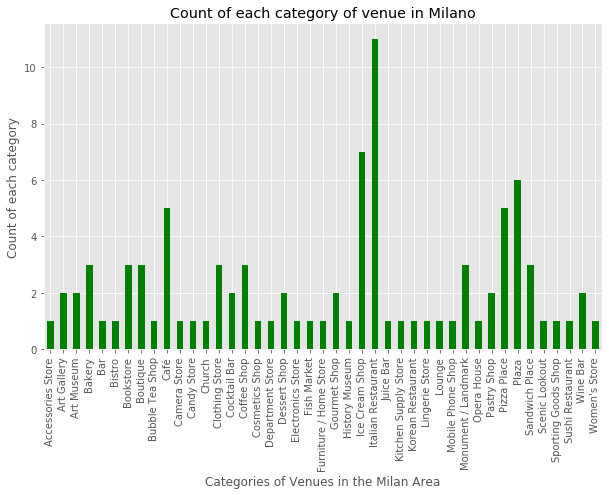

In [123]:
nb.plot(kind='bar', figsize=(10, 6),color='green',legend=None)

plt.xlabel('Categories of Venues in the Milan Area') # add to x-label to the plot
plt.ylabel('Count of each category') # add y-label to the plot
plt.title('Count of each category of venue in Milano') # add title to the plot

plt.show()

__The company can choose from 93 venues available for a short trip in the evenings in the Milan Area within a__
__radius of 500 meters from the Milan Area.There are 43 unique categories of venues like Italian__ __Restaurants,Ice Cream Shops, Plaza, Cafe and Pizza Place with the respective highest counts. Venues also include__
__some of the Art Galleries, Art Museums,Monuments, Cosmetics Store, Boutiques(which are also popular in the City) and__ 
__many others that can be viewed from the above graph.__

In [125]:
#This dataframe also includes hotels that fall within the radius of 500 meters from the Milan Area
nearby_venues2.head()

,name,categories,lat,lng,formattedAddress
0,Piazza del Duomo,Plaza,45.464190,9.189527,"[Piazza del Duomo, 20121 Milano Lombardia, Ita..."
1,Galleria Vittorio Emanuele II,Monument / Landmark,45.465366,9.190034,"[Piazza Del Duomo, 20122 Milano Lombardia, Ita..."
2,Room Mate Giulia Hotel,Hotel,45.465250,9.189396,"[Via silvio Pellico 4, 20121 Milano Lombardia,..."
3,Park Hyatt Milan,Hotel,45.465532,9.188911,"[Via Tommaso Grossi 1, 20121 Milano Lombardia,..."
4,Terrazze del Duomo,Scenic Lookout,45.464207,9.191075,"[Piazza del Duomo, 20100 Milano Lombardia, Ita..."


__Visualising all the venues that fall within the radius of 500 meters from the Milan Area in a folium map.__

In [126]:
# create map of Milano using latitude and longitude values
map_milan= folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, name, categories in zip(nearby_venues2['lat'], nearby_venues2['lng'], nearby_venues2['name'], nearby_venues2['categories']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milan)  
    
map_milan

__Since, the venues are very close to each other they can be easily visited in the Milan Area.__

__Lets merge the data of hotels(all hotels within 500 meters radius of the area) with restaurants,shopping malls and fashion stores obtained using specific search__
__queries in other areas of the Milan City.__

In [183]:
# Merged Data
nb_df = pd.concat([df_hotels, df_fashion,df_shopping,df_Restaurant], ignore_index=True)
nb_df.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,address,categories,city,lat,lng,name,postalCode
0,Via silvio Pellico 4,Hotel,Milano,45.465250,9.189396,Room Mate Giulia Hotel,20121
1,"Largo Augusto, 10",Hotel,Milano,45.463132,9.197880,Hotel NH Collection Milano President,20122
2,"Piazza Giuseppe Missori, 1",Hotel,Milano,45.461031,9.188576,Hotel dei Cavalieri,20123
3,"Via Flavio Baracchini, 12",Hotel,Milano,45.461100,9.191410,Hotel Brunelleschi,20123
4,Via dell'Orso 7,Hotel,Milano,45.469061,9.186865,HMS Hotel Milano Scala,20121


In [184]:
nb_df.shape

(106, 7)

In [185]:
#Checking the count of each category in the merged dataframe
nb1=nb_df.groupby(['categories']).size().reset_index(name='counts')
nb1.head()

,categories,counts
0,Asian Restaurant,1
1,Baby Store,1
2,Bar,1
3,Bistro,2
4,Boutique,4


In [186]:
#Checking the type of each category
nb1.shape

(41, 2)

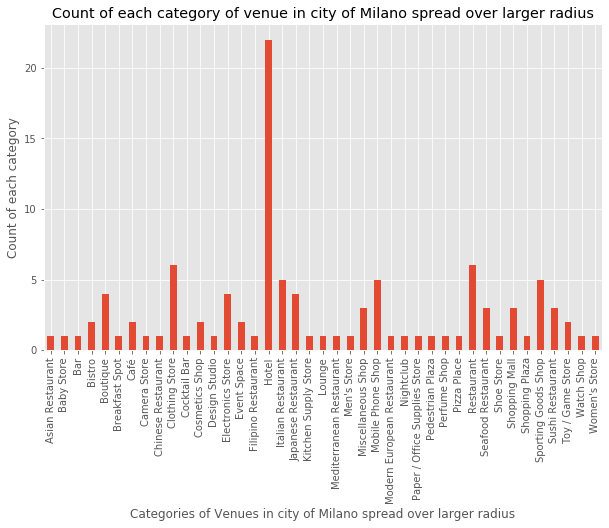

In [189]:
nb1.plot(kind='bar', x= 'categories',figsize=(10, 6),legend=None)

plt.xlabel('Categories of Venues in city of Milano spread over larger radius') # add to x-label to the plot
plt.ylabel('Count of each category') # add y-label to the plot
plt.title('Count of each category of venue in city of Milano spread over larger radius') # add title to the plot

plt.show()

__The company can choose from the 41 categories of places in the city of Milano spread over larger radius for any__ __specific type of hotel, restaurants,shopping malls and fashion stores.From the above graph, we can see that hotels(as they are already choosen from the filtered category)__ 
__have the highest count, followed by clothing stores,mobile phone shop,restaurants,sporting goods shop and others.__

In [ ]:
# Generate map to visualize merged data of hotels,shopping malls,restaurants and fashion stores.
merged_map = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, name, categories, address in zip(nb_df['lat'], nb_df['lng'], 
                                           nb_df['name'], nb_df['categories'],\
                                               nb_df['address']):
    label = '{}, {},{}'.format(name,categories,address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(merged_map)  
    
merged_map

__The company can choose from any one of the above 23 hotels,31 Restaurants,34 fashion stores and 18 shopping malls/places__.
__for any specific type of category of location spread over larger radius in the city of Milano.__

## 2. Further, lets do some analysis on Como data.

Analyzing each neighborhood

In [196]:
#Let's check how many venues were returned for each neighborhood
como_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albavilla,4,4,4,4,4,4
Albese Con Cassano,4,4,4,4,4,4
"Alzate Brianza,Fabbrica Durini,Anzano Del Parco,Alserio,Brenna,Lurago D'Erba,Nobile,Monguzzo",6,6,6,6,6,6
"Arosio,Figino Serenza,Cucciago,Campione D'Italia,Montesolaro,Cabiate,Novedrate,Carugo,Carimate",16,16,16,16,16,16
Asso,4,4,4,4,4,4
"Bellagio,San Giovanni Di Bellagio",50,50,50,50,50,50
"Blessagno,San Fedele Intelvi",4,4,4,4,4,4
Brunate,12,12,12,12,12,12
Canzo,6,6,6,6,6,6


In [197]:
print("The total no of neighborhoods in Como are",len(como_venues['Neighborhood']))

The total no of neighborhoods in Como are 370


In [207]:
cg2=como_venues.groupby('Neighborhood').count()
cg2=cg2.reset_index()

In [208]:
cg2.shape

(45, 7)

In [210]:
cg3=cg2[['Neighborhood','Venue']]
cg3.head()

,Neighborhood,Venue
0,Albavilla,4
1,Albese Con Cassano,4
2,"Alzate Brianza,Fabbrica Durini,Anzano Del Parc...",6
3,"Arosio,Figino Serenza,Cucciago,Campione D'Ital...",16
4,Asso,4


__We can see in the below mentioned graph that the neighborhood having the highest no of venues are 
Bellagio,San Giovanni di Bellagio with 50 venues, Como-Lora(written in short) with 41 venues,Mennaggio with 25 venues,
Mariano Comense,Perticato with 22 venues and Cernobbio with 22 venues followed by others.__

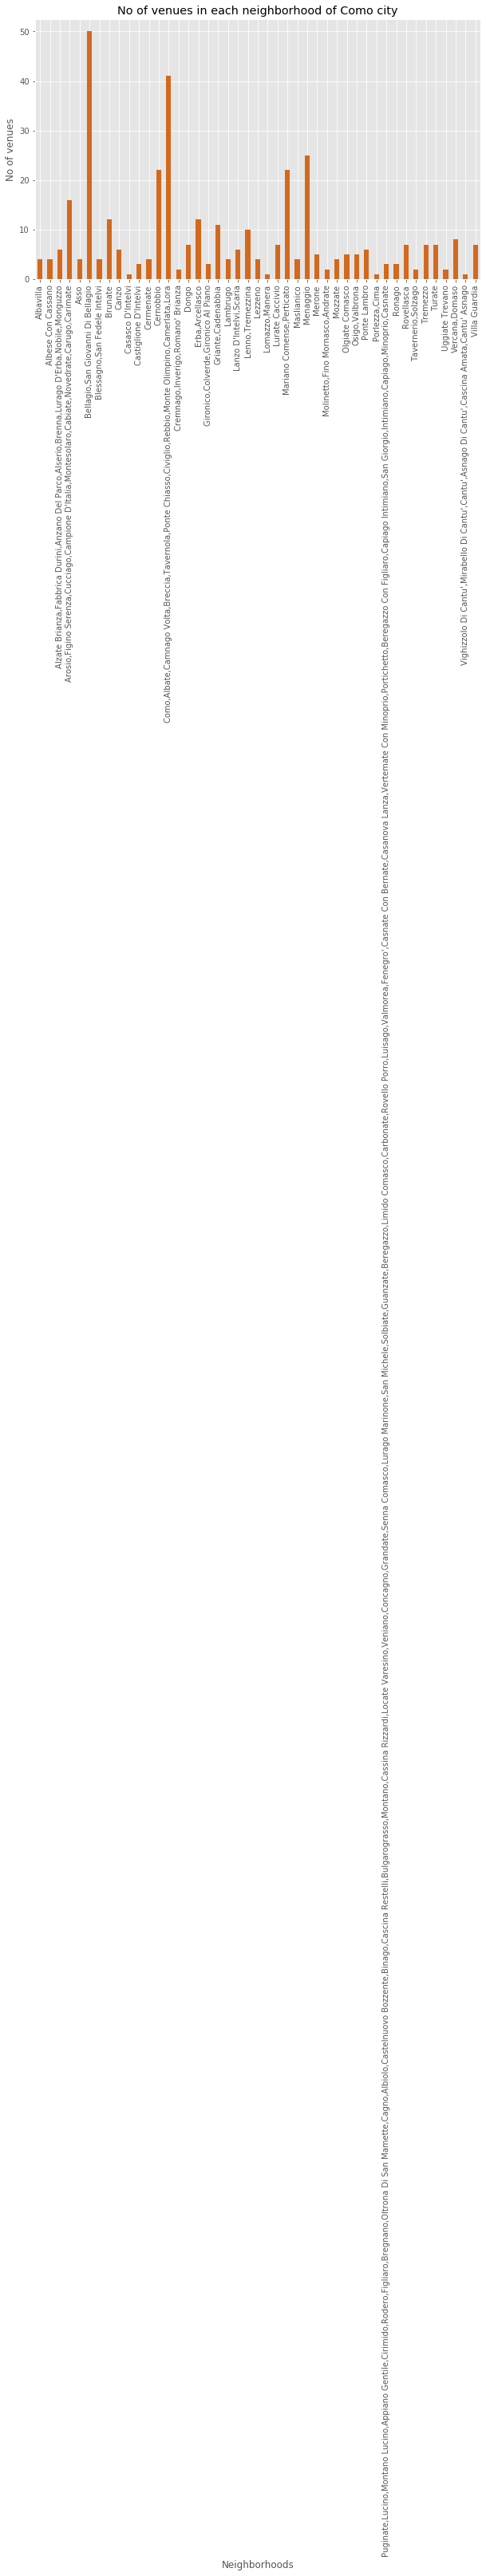

In [212]:
#Plotting a bar graph of no of venues for each neighborhood
cg3.plot(kind='bar', x= 'Neighborhood',y='Venue',figsize=(10, 6),color='chocolate',legend=None)

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('No of venues') # add y-label to the plot
plt.title('No of venues in each neighborhood of Como city') # add title to the plot

plt.show()

In [213]:
#Checking the number of unique categories
print('There are {} uniques categories of venues.'.format(len(como_venues['Venue Category'].unique())))

There are 97 uniques categories of venues.


In [214]:
# one hot encoding
como_onehot = pd.get_dummies(como_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
como_onehot['Neighborhood'] = como_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [como_onehot.columns[-1]] + list(como_onehot.columns[:-1])
como_onehot = como_onehot[fixed_columns]

como_onehot.head()

,Neighborhood,Arcade,Arts & Crafts Store,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beer Bar,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Cable Car,Café,Candy Store,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,Construction & Landscaping,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner,Electronics Store,Farmers Market,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gift Shop,Greek Restaurant,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Mini Golf,Movie Theater,Music Venue,Nightclub,Palace,Park,Pastry Shop,Pharmacy,Physical Therapist,Piadineria,Pier,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Soccer Stadium,Steakhouse,Supermarket,Sushi Restaurant,Theater,Trail,Train Station,Trattoria/Osteria,Used Bookstore,Village,Waterfront,Wine Bar,Wine Shop,Winery
0,"Griante,Cadenabbia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Griante,Cadenabbia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Griante,Cadenabbia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Griante,Cadenabbia",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Griante,Cadenabbia",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
como_onehot.shape

(370, 98)

In [216]:
#let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
como_grouped = como_onehot.groupby('Neighborhood').mean().reset_index()
como_grouped.head(5)

,Neighborhood,Arcade,Arts & Crafts Store,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beer Bar,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Cable Car,Café,Candy Store,Chinese Restaurant,City,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,Construction & Landscaping,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner,Electronics Store,Farmers Market,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gift Shop,Greek Restaurant,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Home Service,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Mini Golf,Movie Theater,Music Venue,Nightclub,Palace,Park,Pastry Shop,Pharmacy,Physical Therapist,Piadineria,Pier,Pizza Place,Playground,Plaza,Pool,Print Shop,Pub,Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Soccer Stadium,Steakhouse,Supermarket,Sushi Restaurant,Theater,Trail,Train Station,Trattoria/Osteria,Used Bookstore,Village,Waterfront,Wine Bar,Wine Shop,Winery
0,Albavilla,0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.25,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,0.250000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2500,0.0,0.000,0.0,0.0,0.0000,0.0,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albese Con Cassano,0.00,0.0,0.25,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.25,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.250,0.0,0.0,0.0000,0.0,0.00,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Alzate Brianza,Fabbrica Durini,Anzano Del Parc...",0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0000,0.0,0.166667,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.333333,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0,0.00,0.0,0.0000,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Arosio,Figino Serenza,Cucciago,Campione D'Ital...",0.00,0.0,0.00,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0625,0.0,0.000000,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.00,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.000000,0.0625,0.0,0.0625,0.0,0.0,0.0,0.0625,0.00,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.125,0.0,0.0,0.0625,0.0,0.00,0.0,0.0625,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Asso,0.25,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.250,0.0,0.0,0.0000,0.0,0.25,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
como_grouped.shape

(45, 98)

__Function to sort the venues in descending order.__

In [218]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [219]:
#create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = como_grouped['Neighborhood']

for ind in np.arange(como_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(como_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albavilla,Pizza Place,Ice Cream Shop,Italian Restaurant,Dessert Shop,Food,Construction & Landscaping,Convenience Store,Convention Center,Cupcake Shop,Diner
1,Albese Con Cassano,Plaza,Bakery,Café,Music Venue,Food,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner
2,"Alzate Brianza,Fabbrica Durini,Anzano Del Parc...",Shopping Mall,Italian Restaurant,Clothing Store,Café,Winery,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner
3,"Arosio,Figino Serenza,Cucciago,Campione D'Ital...",Bar,Plaza,Pizza Place,Pub,Electronics Store,Lounge,College Basketball Court,Japanese Restaurant,Movie Theater,Ice Cream Shop
4,Asso,Arcade,Café,Restaurant,Plaza,Bar,College Basketball Court,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop


__We will be using *k*-means to cluster the neighborhood into 5 clusters.__

In [220]:
# set number of clusters
kclusters = 5

como_grouped_clustering = como_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(como_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 1, 2, 2, 1, 3, 1, 2, 3], dtype=int32)

In [221]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

como_merged = cneighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
como_merged = como_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

como_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22010,Como,"San Gregorio,Pianello Del Lario,San Siro,Piano...",46.049728,9.209642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22011,Como,"Griante,Cadenabbia",45.991950,9.235850,1.0,Italian Restaurant,Hotel,Harbor / Marina,Beach,Convention Center,Café,Boat or Ferry,Pizza Place,Gastropub,Greek Restaurant
2,22012,Como,Cernobbio,45.843100,9.071900,1.0,Italian Restaurant,Hotel,Ice Cream Shop,Café,Restaurant,Bar,Cocktail Bar,Trattoria/Osteria,Park,Brewery
3,22013,Como,"Vercana,Domaso",46.156150,9.333300,1.0,Italian Restaurant,Harbor / Marina,Hotel,Ice Cream Shop,Lake,Café,Shopping Mall,Winery,Food,Convention Center
4,22014,Como,Dongo,46.130000,9.281700,2.0,Pizza Place,Physical Therapist,Home Service,City,Café,Business Service,Flea Market,Convenience Store,Convention Center,Cupcake Shop


In [222]:
# delete rows with none values
como_merged1 = como_merged.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
como_merged1.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,22011,Como,"Griante,Cadenabbia",45.99195,9.23585,1.0,Italian Restaurant,Hotel,Harbor / Marina,Beach,Convention Center,Café,Boat or Ferry,Pizza Place,Gastropub,Greek Restaurant
2,22012,Como,Cernobbio,45.84310,9.07190,1.0,Italian Restaurant,Hotel,Ice Cream Shop,Café,Restaurant,Bar,Cocktail Bar,Trattoria/Osteria,Park,Brewery
3,22013,Como,"Vercana,Domaso",46.15615,9.33330,1.0,Italian Restaurant,Harbor / Marina,Hotel,Ice Cream Shop,Lake,Café,Shopping Mall,Winery,Food,Convention Center
4,22014,Como,Dongo,46.13000,9.28170,2.0,Pizza Place,Physical Therapist,Home Service,City,Café,Business Service,Flea Market,Convenience Store,Convention Center,Cupcake Shop
6,22016,Como,"Lenno,Tremezzina",45.97300,9.19080,1.0,Italian Restaurant,Scenic Lookout,Diner,Ice Cream Shop,Lake,Supermarket,Breakfast Spot,Food,Winery,Convenience Store
7,22017,Como,Menaggio,46.02070,9.23910,1.0,Italian Restaurant,Hotel,Café,Ice Cream Shop,Pier,Pizza Place,Plaza,Mini Golf,Sculpture Garden,Park
8,22018,Como,"Porlezza,Cima",46.03110,9.11020,1.0,Italian Restaurant,Winery,Food & Drink Shop,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner,Electronics Store,Farmers Market
9,22019,Como,Tremezzo,45.98420,9.21610,1.0,Hotel,Garden,Bar,Italian Restaurant,Park,Winery,Food,Convention Center,Cupcake Shop,Dessert Shop
11,22021,Como,"Bellagio,San Giovanni Di Bellagio",45.98770,9.26180,1.0,Italian Restaurant,Hotel,Bar,Restaurant,Café,Ice Cream Shop,Winery,Lake,Mac & Cheese Joint,Dessert Shop
12,22022,Como,Casasco D'Intelvi,45.94370,9.07570,3.0,Restaurant,Winery,Food,Construction & Landscaping,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner,Electronics Store


In [223]:
#Converting the data type of CLuster Labels to integer
como_merged1["Cluster Labels"]= como_merged1["Cluster Labels"].astype(int) 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [224]:
como_merged1.reset_index(inplace = True, drop = True) 
como_merged1.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22011,Como,"Griante,Cadenabbia",45.99195,9.23585,1,Italian Restaurant,Hotel,Harbor / Marina,Beach,Convention Center,Café,Boat or Ferry,Pizza Place,Gastropub,Greek Restaurant
1,22012,Como,Cernobbio,45.84310,9.07190,1,Italian Restaurant,Hotel,Ice Cream Shop,Café,Restaurant,Bar,Cocktail Bar,Trattoria/Osteria,Park,Brewery
2,22013,Como,"Vercana,Domaso",46.15615,9.33330,1,Italian Restaurant,Harbor / Marina,Hotel,Ice Cream Shop,Lake,Café,Shopping Mall,Winery,Food,Convention Center
3,22014,Como,Dongo,46.13000,9.28170,2,Pizza Place,Physical Therapist,Home Service,City,Café,Business Service,Flea Market,Convenience Store,Convention Center,Cupcake Shop
4,22016,Como,"Lenno,Tremezzina",45.97300,9.19080,1,Italian Restaurant,Scenic Lookout,Diner,Ice Cream Shop,Lake,Supermarket,Breakfast Spot,Food,Winery,Convenience Store
5,22017,Como,Menaggio,46.02070,9.23910,1,Italian Restaurant,Hotel,Café,Ice Cream Shop,Pier,Pizza Place,Plaza,Mini Golf,Sculpture Garden,Park
6,22018,Como,"Porlezza,Cima",46.03110,9.11020,1,Italian Restaurant,Winery,Food & Drink Shop,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner,Electronics Store,Farmers Market
7,22019,Como,Tremezzo,45.98420,9.21610,1,Hotel,Garden,Bar,Italian Restaurant,Park,Winery,Food,Convention Center,Cupcake Shop,Dessert Shop
8,22021,Como,"Bellagio,San Giovanni Di Bellagio",45.98770,9.26180,1,Italian Restaurant,Hotel,Bar,Restaurant,Café,Ice Cream Shop,Winery,Lake,Mac & Cheese Joint,Dessert Shop
9,22022,Como,Casasco D'Intelvi,45.94370,9.07570,3,Restaurant,Winery,Food,Construction & Landscaping,Convenience Store,Convention Center,Cupcake Shop,Dessert Shop,Diner,Electronics Store


In [225]:
#Checking the size of the dataframe
como_merged1.shape

(45, 16)

__Visualizing the resulting clusters on the map__

In [226]:
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(como_merged1['Latitude'], como_merged1['Longitude'], como_merged1['Neighborhood'], como_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

In [ ]:
The above analysis show that for the corporate event(5 day program),the company can choose from the any of the 9 hotels and 
1 event space in the Milan Area nearby the Company location in the city and also several nearby venues available for a 
short trip in the evenigs within a radius of 500 meters from the Milan Area to various places in the city.There are 43 
unique categories which includes nearby venues like Italian Restaurants,Ice Cream Shops, Plaza, Cafe and Pizza Place with
the respective highest counts. Venues also include some of the Art Galleries, Art Museums,Monuments, Cosmetics Store, 
Boutiques(which are also popular in the City) and many others.

The company for any specific type of category of location can also choose from any one of the  23 hotels,31 Restaurants,
34 fashion stores and 18 shopping malls/places with 41 unique categories spread over larger(different for each venue)
radius in the city of Milano of venues to have some more options.

There are 45 neighborhoods in Como with 370 venues and 97 unique categories of venues. Top 5 neighborhoods with
highest no of venues are Bellagio,San Giovanni di Bellagio with 50 venues, Como-Lora(big set written in short) with 41 
venues,Mennaggio with 25 venues,Mariano Comense,Perticato with 22 venues and Cernobbio with 22 venues followed by other 
venues.Then,top 10 common venues for each neighborhood in Como are also identified.

Likewise, the company can also choose the neighborhoods in Como as per the top 10 common interested venues/maximum no of 
venues in a neighborhood and plan a one day tour to the city of Como for the executives.

In order to avoid confusion, I would like to clearly state that there are different Milan Neighborhoods/Areas
in the Milan City in the dataset I have obtained. They can be differentiated from each other by checking the postal 
code and also complete address can be easily identified as mentioned above for any interested venue.I would also like to
mention that data returned by Foursquare may vary slightly depending on the time of the day it is run.

I have just used one of the ways to suggest various venues, location and their categories for the city of Milan and Como. 
It is possible that a location may or may not be suitable for any reasons which may be subject to further analysis.
As Milan and Como are big cities,there is a complexity and very different approaches can be tried in clustering and 
classification studies. Moreover, it is obvious that not every classification method can yield the same high quality 
results for the city.

I used the Kmeans algorithm as part of this clustering study for the dataset I have obtained. One can also choose to do
a more detailed study and the details of the neighborhood or street can also be drilled.

I have ended the study by visualising the data of the locations in the Milan Area on one map and data spread over larger
radius of the city in another map. Data of the Como city is also visulaised in a separate map with clusters 
(using **k-means clustering**) of neighborhoods with top 10 common venues in the city to identify general neighborhoods
which should be of interest to the company for choosing venue locations.

## Conclusion <a name="conclusion"></a>

In [ ]:
Purpose of this project was to identify hotels and event space(9 hotels and 1 event space are identified) in the areas 
close to the company location in the Milan Area of the Milan city for the corporate event and also nearby venues(93 venues  
are identified with 43 unique categories of venues) that can be visited in the evenings after work within a radius of 500 
meters from the Area.I have also identified 31 restaurants, 18 shopping malls and 34 fashion stores not specific to any 
neighborhood and spread over a larger radius in the city to give the company few more options of the same.

I have also identified 45 neighborhoods in Como with 370 venues and 97 unique categories of venues. Top 5 neighborhoods 
with highest no of venues are also identified.Then,top 10 common venues for each neighborhood in Como are also identified.

The company can accordingly choose neighborhoods as per the interested venues/maximum no of venues in a neighborhood for one 
day tour of executives to the Como city.

Final decision for choosing optimal venue locations will be made by the company based on specific characteristics of 
neighborhoods and locations in city of Milan and Como, taking into consideration additional factors like attractiveness of 
each location in terms of event for executives,tourist place and opening & closing times for visit.

Several other companies can use similar data analysis types for any type of event/tourist package that they are interested
in organising.